In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy = True

In [3]:
con = sa.create_engine('sqlite:///../DATOS/airbnb2.db')

In [5]:
df = pd.read_sql('df_preparado',con)
df.head()

,level_0,index,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2_immueble,precio_compra,pdi_Sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,...,Chamartín,60.0,50,01_Una,0-2,1,49-743,50,193690.0,5.032039
1,1,1,21853,Bright and airy room,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,...,Latina,31.0,0,01_Una,0-2,1,5-48,50,84140.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,...,Arganzuela,50.0,39,03_Tres,4-16,3-23,0-4,90,269766.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,...,Centro,92.0,68,01_Una,0-2,1,5-48,50,180985.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,...,Arganzuela,26.0,4,01_Una,0-2,1,49-743,50,149870.0,3.200942


In [6]:
df.precio_total.describe().T

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: precio_total, dtype: float64

In [7]:
#la mediana representa mas la distribucion que la media, en este caso
df.precio_total.median()

70.0

In [10]:
df.groupby('distrito').precio_total.median().sort_values(ascending=False)

distrito
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: precio_total, dtype: float64

In [14]:
df.loc[df.distrito == 'San Blas - Canillejas'].sort_values('precio_total',ascending=False).head(10)
#INSIGHT Nº1 : NEGOCIO EN: ALQUILAR IMMUEBLES CERCA DE EVENTOS DEPORTIVOS

,level_0,index,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2_immueble,precio_compra,pdi_Sol
9290,9290,9290,34600594,3 rooms near Wanda,Julia,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,...,San Blas - Canillejas,9800.0,100,03_Tres,4-16,3-23,0-4,90,167958.0,7.532233
9662,9662,9662,34826962,Pozos rooms,Kevin,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,...,San Blas - Canillejas,6300.0,75,02_Dos,3,2,0-4,70,130634.0,7.439364
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,Fernando,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,...,San Blas - Canillejas,6000.0,0,04_Cuatro_o_mas,4-16,3-23,0-4,120,223944.0,8.212429
9668,9668,9668,34833756,Wanda Champions Final,Carolina,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,...,San Blas - Canillejas,5670.0,100,02_Dos,4-16,2,0-4,70,130634.0,8.391922
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,Chencho,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,...,San Blas - Canillejas,4480.0,75,04_Cuatro_o_mas,4-16,3-23,0-4,150,279930.0,7.714952
9748,9748,9748,34882596,2 rooms near wanda,Julia,San Blas - Canillejas,Arcos,40.41948,-3.61427,Private room,...,San Blas - Canillejas,4200.0,0,02_Dos,3,3-23,0-4,70,130634.0,7.548577
9173,9173,9173,34522997,Beautiful Penthouse next to Wanda Metropolitano,Gema,San Blas - Canillejas,Canillejas,40.43686,-3.61093,Private room,...,San Blas - Canillejas,4200.0,100,01_Una,3,2,0-4,50,93310.0,8.138310
9831,9831,9831,34933116,FINAL CHAMPIONS LEAGUE MADRID,María Ángeles,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,...,San Blas - Canillejas,4200.0,0,03_Tres,4-16,2,0-4,90,167958.0,7.557076
10092,10092,10092,35091283,FINAL CHAMPIONS LEAGUE,Victor,San Blas - Canillejas,Rejas,40.44592,-3.58746,Private room,...,San Blas - Canillejas,4200.0,50,02_Dos,4-16,3-23,0-4,70,130634.0,10.334061
10404,10404,10404,35251141,Se alquila para final de la champion league,Adrian,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,...,San Blas - Canillejas,3000.0,0,02_Dos,0-2,3-23,0-4,70,130634.0,8.610212


In [21]:
#framework suizo
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()

In [16]:
df.loc[df.distrito =='Tetuán'].sort_values('precio_total',ascending=False).head(10)

,level_0,index,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2_immueble,precio_compra,pdi_Sol
13133,13133,13133,42085732,Estupendo Loft en Tetuan,Global Market,Tetuán,Berruguete,40.46006,-3.70522,Entire home/apt,...,Tetuán,8000.0,100,01_Una,3,1,0-4,50,137095.0,4.822313
10228,10228,10228,35160128,Champions league 3 bedrooms 2 bathrooms,Javier,Tetuán,Cuatro Caminos,40.45621,-3.69284,Private room,...,Tetuán,5040.0,50,03_Tres,4-16,3-23,0-4,90,246771.0,4.480500
3770,3770,3770,17540293,Spacious flat in Madrid - 日本人いらっしゃい,Kana&Luis,Tetuán,Castillejos,40.46247,-3.69526,Entire home/apt,...,Tetuán,5000.0,100,02_Dos,0-2,1,0-4,70,191933.0,5.133496
3726,3726,3726,17363530,Single Room close to city center,Kana&Luis,Tetuán,Castillejos,40.46254,-3.69386,Private room,...,Tetuán,5000.0,100,01_Una,0-2,1,5-48,50,137095.0,5.158315
9710,9710,9710,34856359,Champions League 3 bedrooms!,Sergio,Tetuán,Cuatro Caminos,40.44905,-3.69865,Private room,...,Tetuán,2100.0,50,03_Tres,4-16,2,0-4,90,246771.0,3.616929
13340,13340,13340,42492960,Apartamento dúplex 10camas en literas,Lucian,Tetuán,Cuatro Caminos,40.44959,-3.70138,Private room,...,Tetuán,2086.0,0,01_Una,4-16,3-23,0-4,50,137095.0,3.658902
9889,9889,9889,34973839,HOUSE RENT FOR THE CHAMPIONS FINAL.,Jade,Tetuán,Valdeacederas,40.46360,-3.69799,Entire home/apt,...,Tetuán,1600.0,0,02_Dos,4-16,3-23,0-4,70,191933.0,5.233048
10161,10161,10161,35135275,Huge modern flat with Terrace in the center,Sylvain,Tetuán,Almenara,40.46607,-3.69150,Entire home/apt,...,Tetuán,1500.0,75,03_Tres,4-16,2,0-4,90,246771.0,5.578901
10305,10305,10305,35194535,Champions,Alberto,Tetuán,Bellas Vistas,40.45257,-3.70645,Private room,...,Tetuán,1500.0,0,01_Una,0-2,1,0-4,50,137095.0,3.995289
13519,13519,13519,42733027,Luxury Apartments in Cuzco by Allô Housing,Allô,Tetuán,Cuatro Caminos,40.45684,-3.70007,Entire home/apt,...,Tetuán,1389.0,5,02_Dos,3,1,0-4,70,191933.0,4.470106


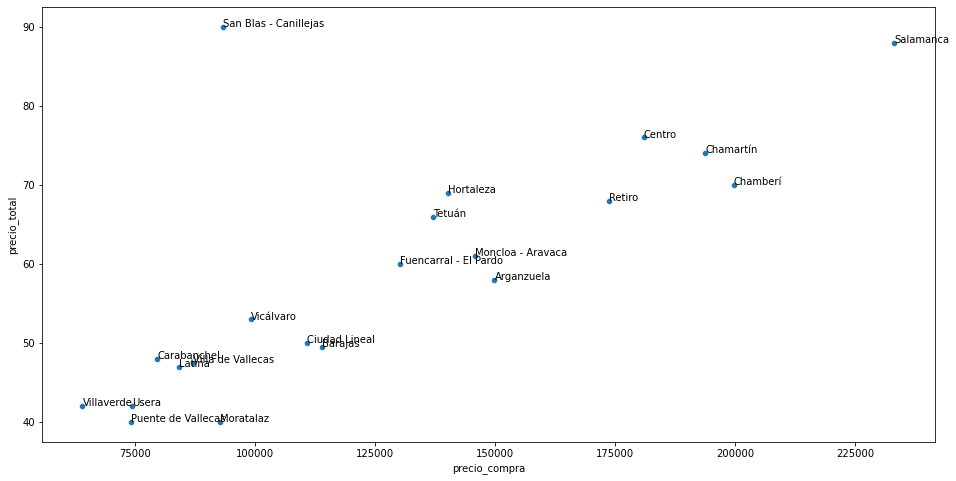

In [25]:
plt.figure(figsize= (16,8))
sns.scatterplot(data = temp ,x = 'precio_compra', y = 'precio_total')

for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada],temp.precio_total[cada],temp.index[cada]);
    #aqui se pueden ver 3 clusters

In [28]:
#nivel de barrio en vez de nivel distrito
temp2 = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()

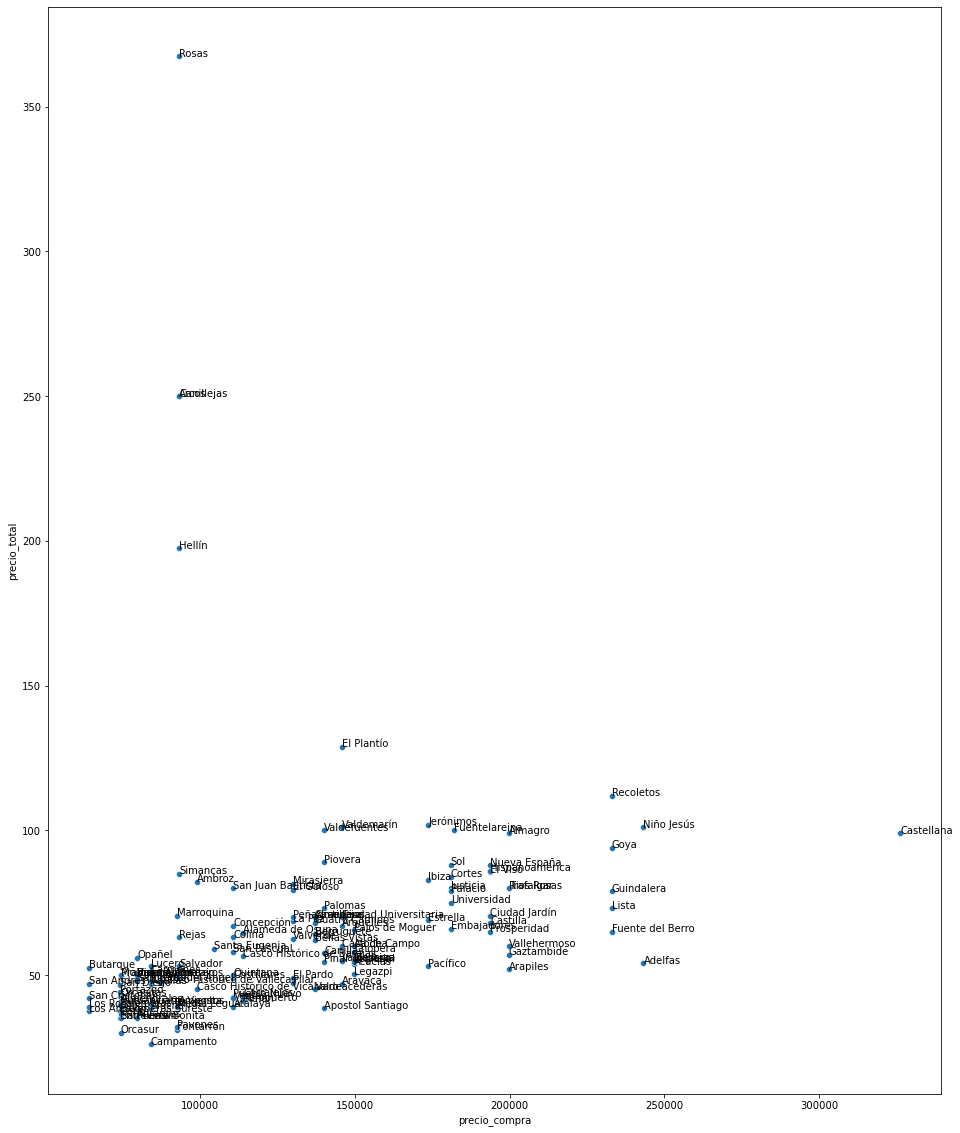

In [30]:
plt.figure(figsize= (16,20))
sns.scatterplot(data = temp2 ,x = 'precio_compra', y = 'precio_total')

for cada in range(0,temp2.shape[0]):
    plt.text(temp2.precio_compra[cada],temp2.precio_total[cada],temp2.index[cada]);
#Hay ciertas zonas, segun el segmento en el que nos encontremos
#donde el precio de alquiler es superior a la media , teniendo el mismo precio de compra

In [31]:
df.filter(like='disc')

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc
0,01_Una,0-2,1,49-743
1,01_Una,0-2,1,5-48
2,03_Tres,4-16,3-23,0-4
3,01_Una,0-2,1,5-48
4,01_Una,0-2,1,49-743
...,...,...,...,...
17705,01_Una,0-2,1,0-4
17706,01_Una,0-2,1,0-4
17707,01_Una,0-2,1,0-4
17708,01_Una,0-2,1,0-4


In [32]:
#Creacion de minicubo
#Cuando hay que cruzar muchas variables,es recomendable hacer el minicubo de la otra forma solo se pueden cruzar cada 2

#Paso 1
metricas = ['precio_total','precio_compra']

dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,precio_total,precio_compra
0,01_Una,0-2,1,60.0,193690.0
1,01_Una,0-2,1,31.0,84140.0
2,03_Tres,4-16,3-23,50.0,269766.0
3,01_Una,0-2,1,92.0,180985.0
4,01_Una,0-2,1,26.0,149870.0
...,...,...,...,...,...
17705,01_Una,0-2,1,29.0,180985.0
17706,01_Una,0-2,1,29.0,180985.0
17707,01_Una,0-2,1,29.0,180985.0
17708,01_Una,0-2,1,29.0,233030.0


In [34]:
#Paso 2 de pasar de formato tabular a trasnaccional
minicubo_precio = minicubo_precio.melt(id_vars = ['precio_total','precio_compra'])

In [40]:
#Paso 3 agregacion de metricas por variable y valor con funciones de agregacion mas oportunas (tipicas = suma,media, conteo..)

minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
#Resultado final cruce entre todas las variables y todos sus distintos valores

In [45]:
#EXPLOTACION DEL MINICUBO
#ANALIZAMOS EL NUMERO DE HABITACIONES
minicubo_precio.loc['bedrooms_disc']

,precio_total,precio_compra
value,,
01_Una,56.0,180985.0
02_Dos,100.0,253379.0
03_Tres,140.0,325773.0
04_Cuatro_o_mas,204.0,434364.0


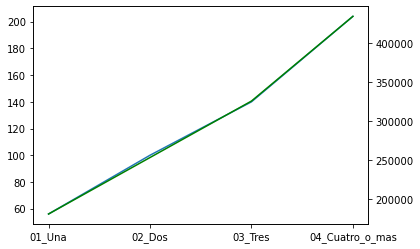

In [47]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra, color='green');
#Hay una relacion casi perfecta entre el numero de habitacion y el precio que podemos cobrar de alquiler

In [48]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
1,59.0,180985.0
2,100.0,253379.0
3-23,139.0,269766.0


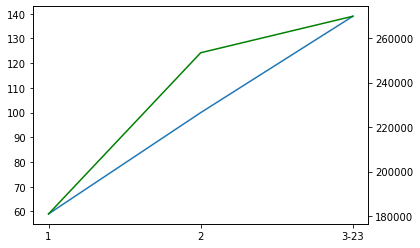

In [49]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra, color='green');
#el precio de alquiler se incrementa de manera lineal comforme el incremento de camas
#el precio del immueble , aquellos immuebles que tienen 2 camas, tienen un precio de compra superior
#INSIGHT:O BIEN BUSCAS UN IMMUEBLE EN EL CUAL ALQUILES A 1 PERSONA 1 CAMA
#O BIEN TE PASAS AL GRADO DE 3 O VARIAS CAMAS , PORQUE DOS ES MUY CARO  Y SALES PERDIENDO CON RESPECTO A COMPRAR DE 3 a x camas

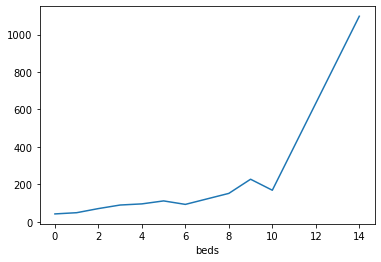

In [51]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot();

In [52]:
minicubo_precio.loc['accommodates_disc']

,precio_total,precio_compra
value,,
0-2,50.0,180985.0
3,86.0,180985.0
4-16,126.0,253379.0


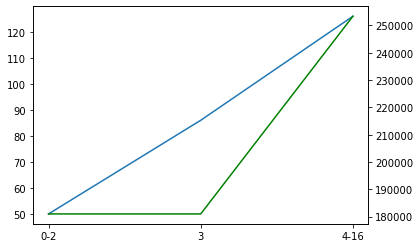

In [53]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra, color='green');
#el numero optimo de huespedes esta en 3, ya que el precio de los immuebles para acomodar 3 es el mismo que acomodar 1 o 2

In [56]:
df.groupby('distrito').pdi_Sol.median().sort_values()

distrito
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: pdi_Sol, dtype: float64

In [61]:
seleccion = df.groupby('distrito').pdi_Sol.median().sort_values()[0:7].index.to_list()
seleccion

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa - Aravaca',
 'Retiro',
 'Salamanca',
 'Latina']

In [63]:
df.loc[df.distrito.isin(seleccion)]

,level_0,index,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2_immueble,precio_compra,pdi_Sol
1,1,1,21853,Bright and airy room,Abdel,Latina,Cármenes,40.403810,-3.741300,Private room,...,Latina,31.0,0,01_Una,0-2,1,5-48,50,84140.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,Jesus,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,...,Arganzuela,50.0,39,03_Tres,4-16,3-23,0-4,90,269766.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,A,Centro,Universidad,40.421830,-3.705290,Entire home/apt,...,Centro,92.0,68,01_Una,0-2,1,5-48,50,180985.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,Agustina,Arganzuela,Legazpi,40.389750,-3.690180,Private room,...,Arganzuela,26.0,4,01_Una,0-2,1,49-743,50,149870.0,3.200942
5,5,5,28200,Apartamento Arganzuela Planetario,Jesus,Arganzuela,Legazpi,40.388600,-3.694920,Entire home/apt,...,Arganzuela,85.0,38,03_Tres,3,2,5-48,90,269766.0,3.208784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,17705,17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,Svetlana,Centro,Justicia,40.424384,-3.691216,Private room,...,Centro,29.0,1,01_Una,0-2,1,0-4,50,180985.0,1.333715
17706,17706,17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,Svetlana,Centro,Justicia,40.424447,-3.691309,Private room,...,Centro,29.0,1,01_Una,0-2,1,0-4,50,180985.0,1.332195
17707,17707,17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,Svetlana,Centro,Justicia,40.424989,-3.691783,Private room,...,Centro,29.0,1,01_Una,0-2,1,0-4,50,180985.0,1.342319
17708,17708,17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,Svetlana,Salamanca,Recoletos,40.424352,-3.690211,Private room,...,Salamanca,29.0,1,01_Una,0-2,1,0-4,50,233030.0,1.398097


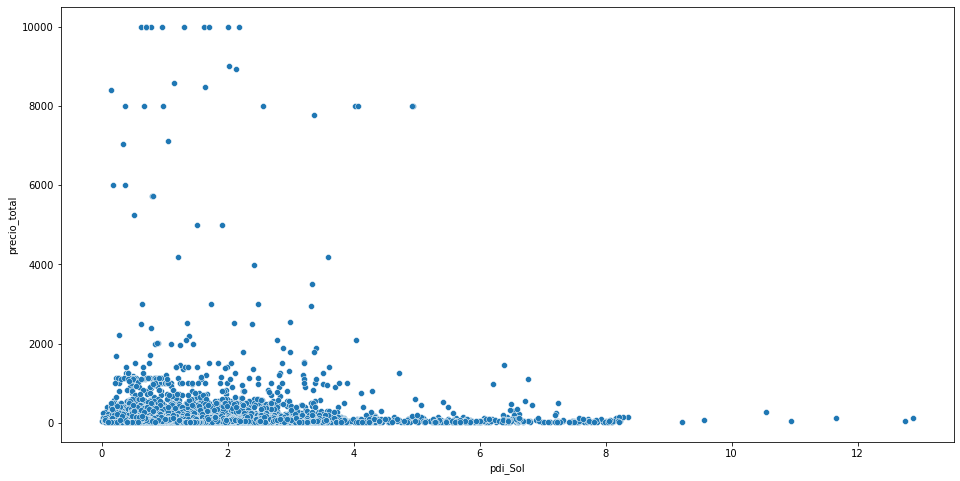

In [64]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)],x='pdi_Sol',y='precio_total');
#insight no existe una relacion entre la cercania a puerta del sol y el valor por el cual se puede alquilar el immueble
#si nos vamos a 2km de la puerta del sol la diferencia de precio no cambia

In [65]:
import folium

In [69]:
#iniciamos mapa
folium.Map(location= [40.4167278,-3.7033387],zoom_start =13)

In [70]:
#Representacion de los immuebles,pondremos los  registros que tienen que ver con San Blas
datos = df[df.distrito == 'San Blas - Canillejas'].copy()
datos


,level_0,index,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2_immueble,precio_compra,pdi_Sol
141,141,141,479718,Wanda Stadium. Madrid. 20 minutes from Sol by ...,Jesús,San Blas - Canillejas,Rosas,40.432020,-3.603530,Private room,...,San Blas - Canillejas,36.0,69,01_Una,0-2,1,5-48,50,93310.0,8.620512
152,152,152,518208,LOVELY ORANGE ROOM & NEAR WANDA´S STAADIUM,Marina,San Blas - Canillejas,Arcos,40.427560,-3.615770,Private room,...,San Blas - Canillejas,29.4,27,01_Una,0-2,1,5-48,50,93310.0,7.512148
247,247,247,755535,LOVELY ROOM & NEAR WANDA´S STADIUM,Marina,San Blas - Canillejas,Arcos,40.427610,-3.615800,Private room,...,San Blas - Canillejas,29.4,99,01_Una,0-2,1,5-48,50,93310.0,7.510532
250,250,250,758670,LOVELY ROOM & NEAR WANDA´S STADIUM,Marina,San Blas - Canillejas,Arcos,40.426700,-3.616310,Private room,...,San Blas - Canillejas,21.0,28,01_Una,0-2,1,5-48,50,93310.0,7.452229
253,253,253,761095,Compostela Suites Madrid Airport / 2BD,Compostela,San Blas - Canillejas,Rejas,40.447910,-3.579180,Entire home/apt,...,San Blas - Canillejas,85.0,0,02_Dos,0-2,1,5-48,70,130634.0,11.068977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17339,17339,17339,51602462,🌟Habitación Wanda,Giuliana & Mario,San Blas - Canillejas,Canillejas,40.436886,-3.608566,Private room,...,San Blas - Canillejas,32.0,7,01_Una,0-2,1,0-4,50,93310.0,8.331702
17554,17554,17554,51906548,"Loft Deluxe , apartamento oficina , Ciudad Li...",Lara,San Blas - Canillejas,Simancas,40.434867,-3.633209,Entire home/apt,...,San Blas - Canillejas,45.0,7,01_Una,3,1,0-4,50,93310.0,6.271326
17628,17628,17628,52083353,🌟 Habitación cerca del aeropuerto,Giuliana & Mario,San Blas - Canillejas,Canillejas,40.436899,-3.611810,Private room,...,San Blas - Canillejas,29.0,0,01_Una,0-2,1,0-4,50,93310.0,8.067943
17634,17634,17634,52089835,Pequeña pero confortable,Rosario,San Blas - Canillejas,Rosas,40.426300,-3.609220,Private room,...,San Blas - Canillejas,23.0,0,01_Una,0-2,1,0-4,50,93310.0,8.040401


In [72]:
#1 iniciamos mapa
mapa = folium.Map(location= [40.4167278,-3.7033387],zoom_start = 13 ) #Paso 1 Crear un objeto de mapa

for piso in range(0,len(datos)): #Paso 2 recorrer todos los registros 
    #ponemos un marcador por cada registro(immueble)
    folium.Marker(
    location = [datos.iloc[piso]['latitude'],datos.iloc[piso]['longitude']],#Paso 3 decir a cada uno de ellos las coords
    popup = datos.iloc[piso]['precio_total']).add_to(mapa) #y decirle si queremos visualizar en el popup el precio por ejemplo
mapa

In [76]:
#Representar de una manera mas visual
#primero crear una variable discretizada del precio y ponerle cuatro colores y utilizar otro tipo de marcador que permita 
#poner esos colores
datos['precio_total_disc'] = pd.qcut(datos['precio_total'],q = [0,0.25,0.5,0.75,1],
       labels = ['yellow','orange','blue','red'])

In [77]:
#1 iniciamos mapa
mapa = folium.Map(location= [40.4167278,-3.7033387],zoom_start = 13 ) #Paso 1 Crear un objeto de mapa

for piso in range(0,len(datos)): #Paso 2 recorrer todos los registros 
    #ponemos un marcador por cada registro(immueble)
    folium.CircleMarker(
    location = [datos.iloc[piso]['latitude'],datos.iloc[piso]['longitude']],#Paso 3 decir a cada uno de ellos las coords
    popup = datos.iloc[piso]['precio_total'],
    fill = True,
    color = datos.iloc[piso]['precio_total_disc'],
    fill_opacity = 1,
    radius = 5).add_to(mapa) #y decirle si queremos visualizar en el popup el precio por ejemplo
mapa